Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8299 - loss: 0.6041 - val_accuracy: 0.9507 - val_loss: 0.1628
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9570 - loss: 0.1466 - val_accuracy: 0.9654 - val_loss: 0.1174
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9733 - loss: 0.0944 - val_accuracy: 0.9705 - val_loss: 0.0939
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9788 - loss: 0.0688 - val_accuracy: 0.9742 - val_loss: 0.0817
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9841 - loss: 0.0536 - val_accuracy: 0.9745 - val_loss: 0.0815
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9876 - loss: 0.0404 - val_accuracy: 0.9765 - val_loss: 0.0737
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9895 - loss: 0.0343 - val_accuracy: 0.9722 - val_loss: 0.0895
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9906 - loss: 0.0300 - val_accuracy: 0.

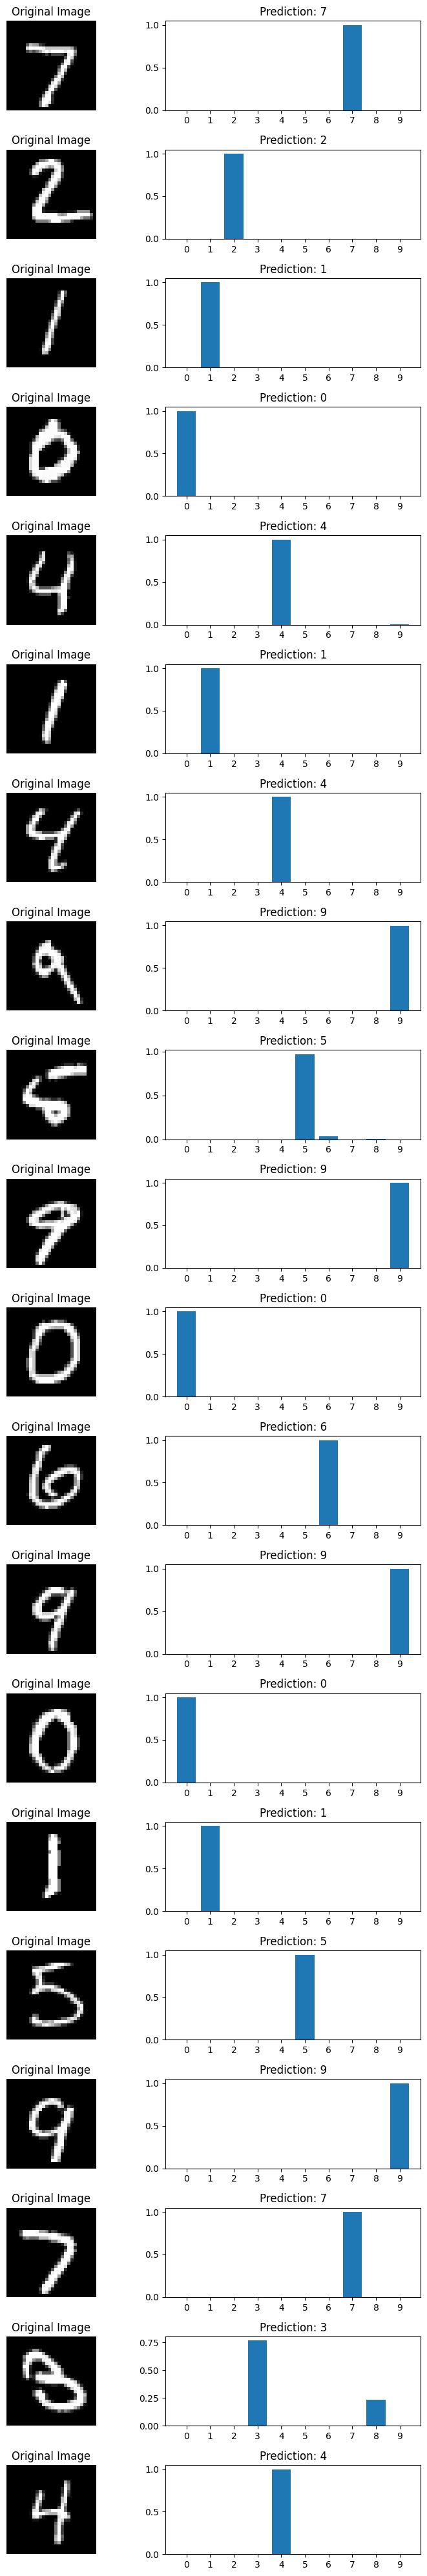

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28*28) / 255.0
x_test = x_test.reshape(-1, 28*28) / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Create the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
_, accuracy = model.evaluate(x_test, y_test)
print("Accuracy on test set:", accuracy)

# Show all examples in test set
num_examples = 20

fig, axes = plt.subplots(num_examples, 2, figsize=(8, 2*num_examples))

for i in range(num_examples):
    image = x_test[i].reshape(28, 28)  # Reshape the image
    prediction = model.predict(x_test[i].reshape(1, 784))  # Prediction for the image
    predicted_class = tf.argmax(prediction[0]).numpy()  # Find the class with the highest probability

    axes[i, 0].imshow(image, cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title('Original Image')

    axes[i, 1].bar(range(10), prediction[0])
    axes[i, 1].set_xticks(range(10))
    axes[i, 1].set_title('Prediction: {}'.format(predicted_class))

plt.tight_layout()
plt.show()